In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt

from jupyterthemes import jtplot
jtplot.style(figsize=(13, 9), ticks=False)

# two numeric (not ordered)

In [2]:
data = pd.read_csv("2_TwoNum.csv")
data.columns

Index(['GrLivArea', 'SalePrice'], dtype='object')

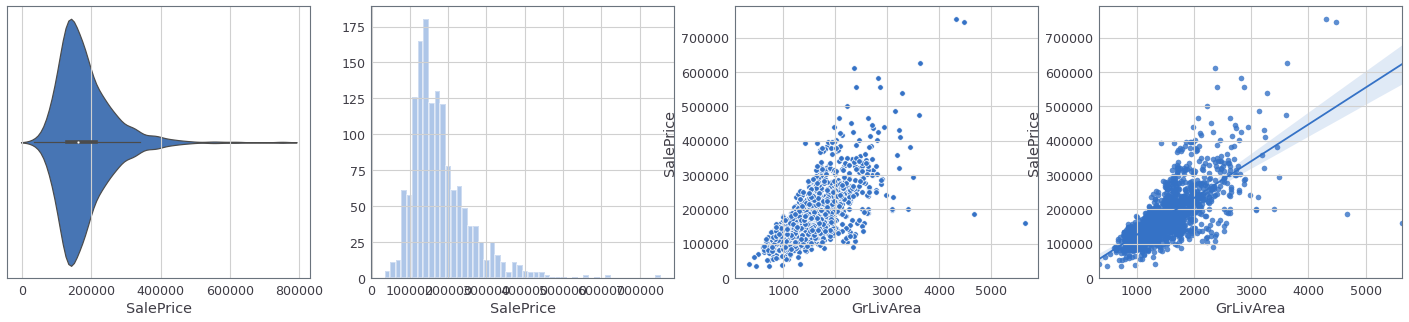

In [3]:
fig, axs = plt.subplots(ncols=4, figsize=(25, 5))
sns.violinplot(data.SalePrice, ax=axs[0]) # alternative to boxplot
sns.distplot(data.SalePrice, kde=False, bins=50, hist_kws=dict(edgecolor="w", linewidth=2), ax=axs[1])
sns.scatterplot(data.GrLivArea, data.SalePrice, ax=axs[2])
sns.regplot(data.GrLivArea, data.SalePrice, ax=axs[3])

## large sample size

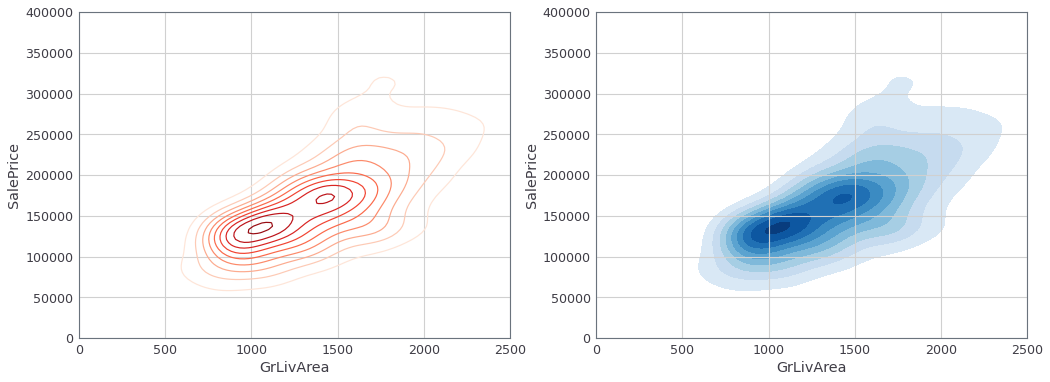

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 6))
sns.kdeplot(data.GrLivArea, data.SalePrice, cmap="Reds", clip=[(0, 2500), (0, 400000)], ax=axs[0]) # contour
sns.kdeplot(data.GrLivArea, data.SalePrice, cmap="Blues", clip=[(0, 2500), (0, 400000)], shade=True, shade_lowest=False, ax=axs[1]) # area

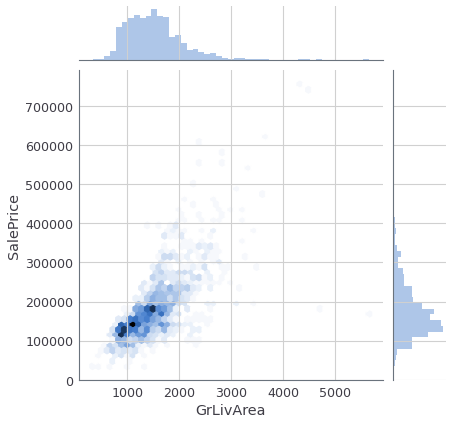

In [5]:
sns.jointplot(data.GrLivArea, data.SalePrice, kind="hex")

# two numeric(ordered)

In [6]:
data = pd.read_csv("3_TwoNumOrdered_comma.csv", parse_dates=True)
data.columns

Index(['date', 'value'], dtype='object')

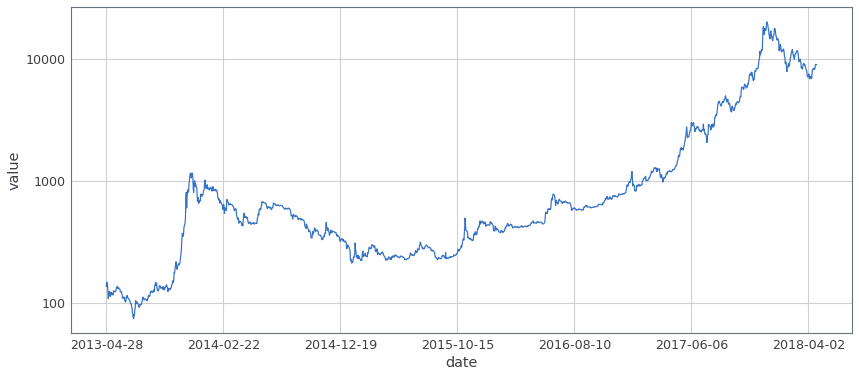

In [7]:
# log scaled lineplot with 
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_yscale('log')
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
sns.lineplot(data.date, data.value, ax=ax)

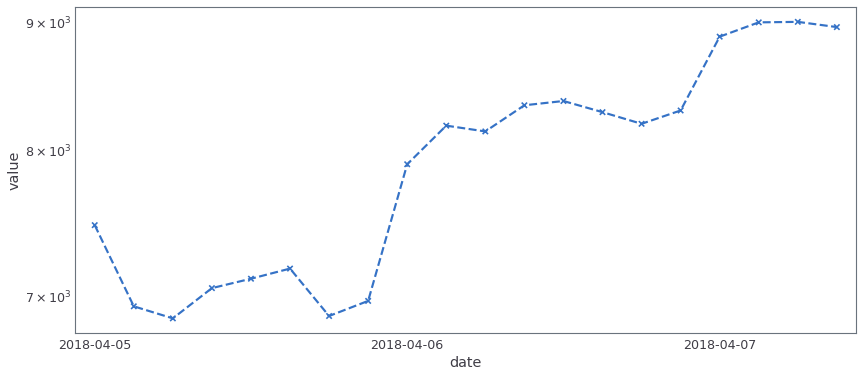

In [8]:
small_data = data.iloc[-20:]
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_yscale('log')
sns.pointplot(small_data.date, small_data.value, ax=ax, markers="x", linestyles="dashed")
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.xaxis.set_major_locator(plt.MaxNLocator(3))

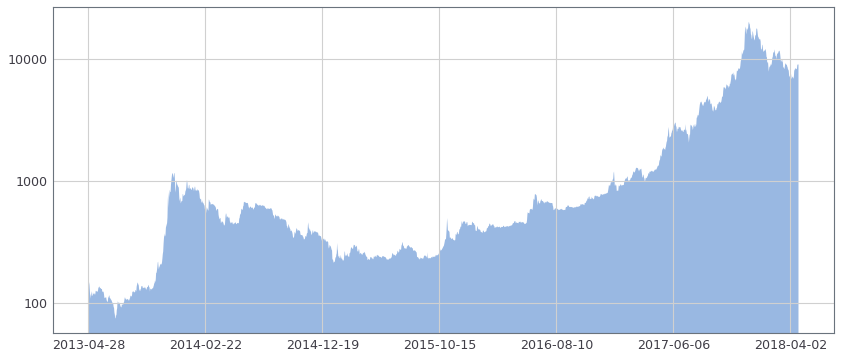

In [9]:
# log scaled areaplot
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_yscale('log')
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.stackplot(data.date, data.value, alpha=0.5)

# three numeric(not ordered)

In [10]:
data = pd.read_csv("4_ThreeNum.csv")
data["pop"] = data["pop"] / 1000000
data.head()

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.828,31.889923,974.580338
1,Albania,Europe,76.423,3.600523,5937.029526
2,Algeria,Africa,72.301,33.333216,6223.367465
3,Angola,Africa,42.731,12.420476,4797.231267
4,Argentina,Americas,75.320,40.301927,12779.379640


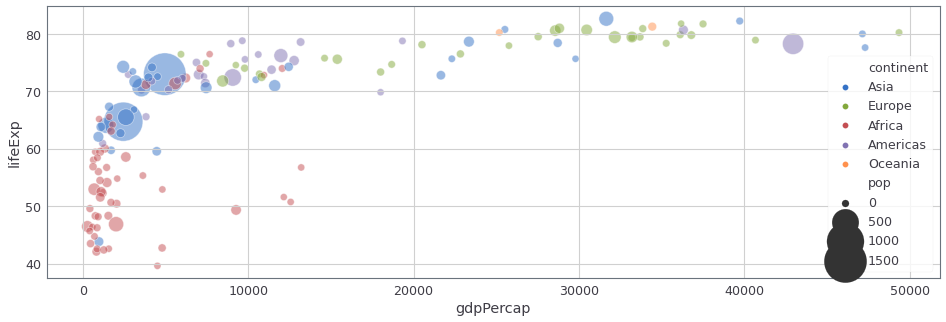

In [11]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.scatterplot("gdpPercap", "lifeExp", hue="continent", size="pop",  sizes=(50, 1800), data=data, alpha=0.5, ax=ax, legend="brief")

# three numeric(ordered) or several numeric(ordered)

In [5]:
data = pd.read_csv("5_OneCatSevNumOrdered.csv")
data.head()

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
1,1880,F,Amanda,241,0.002469
2,1880,F,Betty,117,0.001199
3,1880,F,Dorothy,112,0.001147
4,1880,F,Linda,27,0.000277


In [6]:
# wide format
wdata = data.pivot("year", "name", "n")
wdata.head()

name,Amanda,Ashley,Betty,Deborah,Dorothy,Helen,Jessica,Linda,Patricia
year,,,,,,,,,
1880,241.0,NaN,117.0,12.0,112.0,636.0,7.0,27.0,NaN
1881,263.0,NaN,112.0,14.0,109.0,612.0,7.0,38.0,NaN
1882,288.0,NaN,123.0,15.0,115.0,838.0,8.0,36.0,NaN
1883,287.0,NaN,120.0,16.0,141.0,862.0,6.0,49.0,NaN
1884,337.0,NaN,144.0,13.0,163.0,986.0,14.0,33.0,6.0


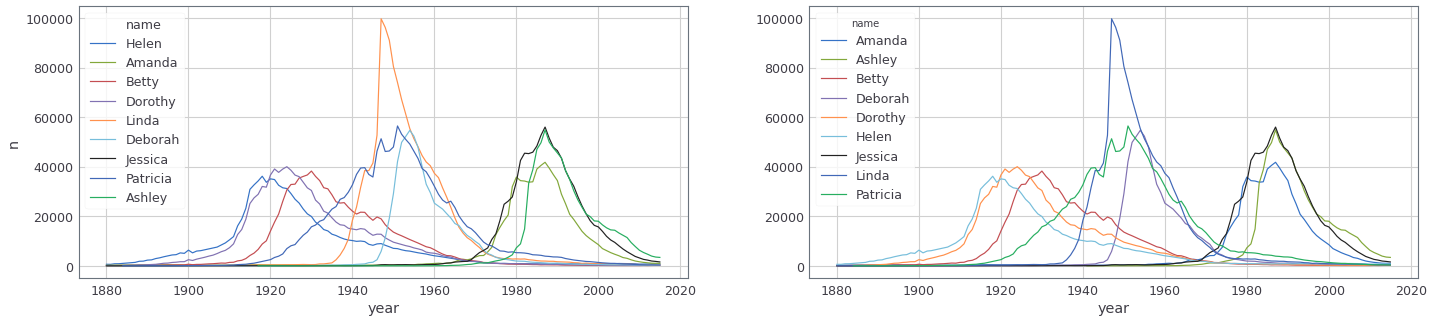

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(24, 5))
sns.lineplot("year", "n", hue="name", data=data, ax=axs[0])
wdata.plot(ax=axs[1])

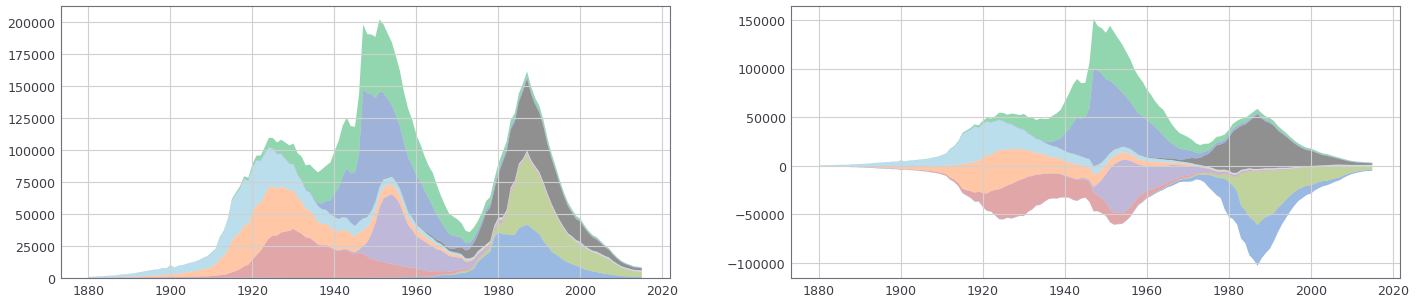

In [35]:
# stackplot & streamplot
fig, axs = plt.subplots(ncols=2, figsize=(24, 5))
axs[0].stackplot(wdata.index, wdata.T.fillna(0), alpha=0.5)
axs[1].stackplot(wdata.index, wdata.T.fillna(0), alpha=0.5, baseline="wiggle")

# several numeric(not ordered)

In [9]:
data = pd.read_csv("6_SeveralNum.csv")
data = data.rename({"Unnamed: 0": "model"}, axis=1).set_index("model")
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [153]:
# scaler
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(data) 
data.loc[:,:] = scaled_values

In [145]:
# wide format to long format
ldata = data.reset_index().melt(id_vars=["model"], var_name='factor', value_name='value')
ldata.head()

,model,factor,value
0,Mazda RX4,mpg,0.284896
1,Mazda RX4 Wag,mpg,0.284804
2,Datsun 710,mpg,0.447115
3,Hornet 4 Drive,mpg,0.182675
4,Hornet Sportabout,mpg,0.086687


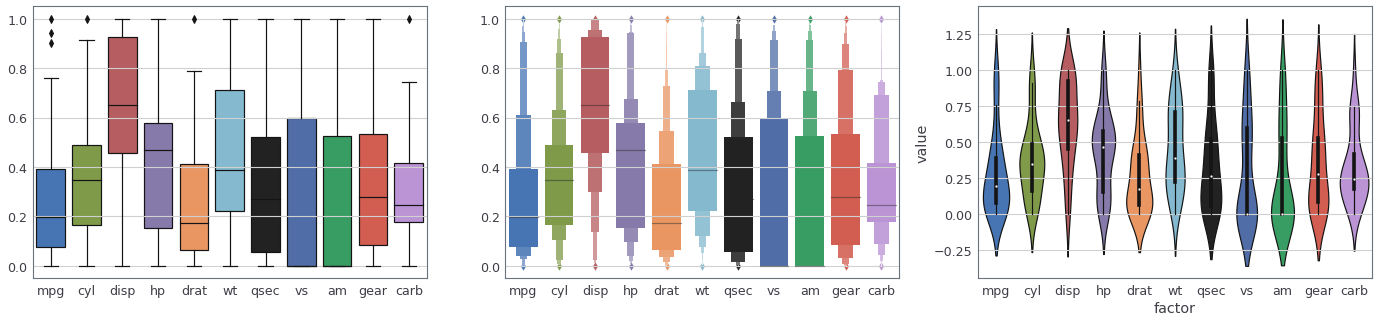

In [146]:
fig, axs = plt.subplots(ncols=3, figsize=(24, 5))
sns.boxplot(data=data, ax=axs[0]) # for wide format
sns.boxenplot(data=data, ax=axs[1]) # for wide format
sns.violinplot(x="factor", y="value", data=ldata, ax=axs[2]) # for long format
# The problem: not the same scale

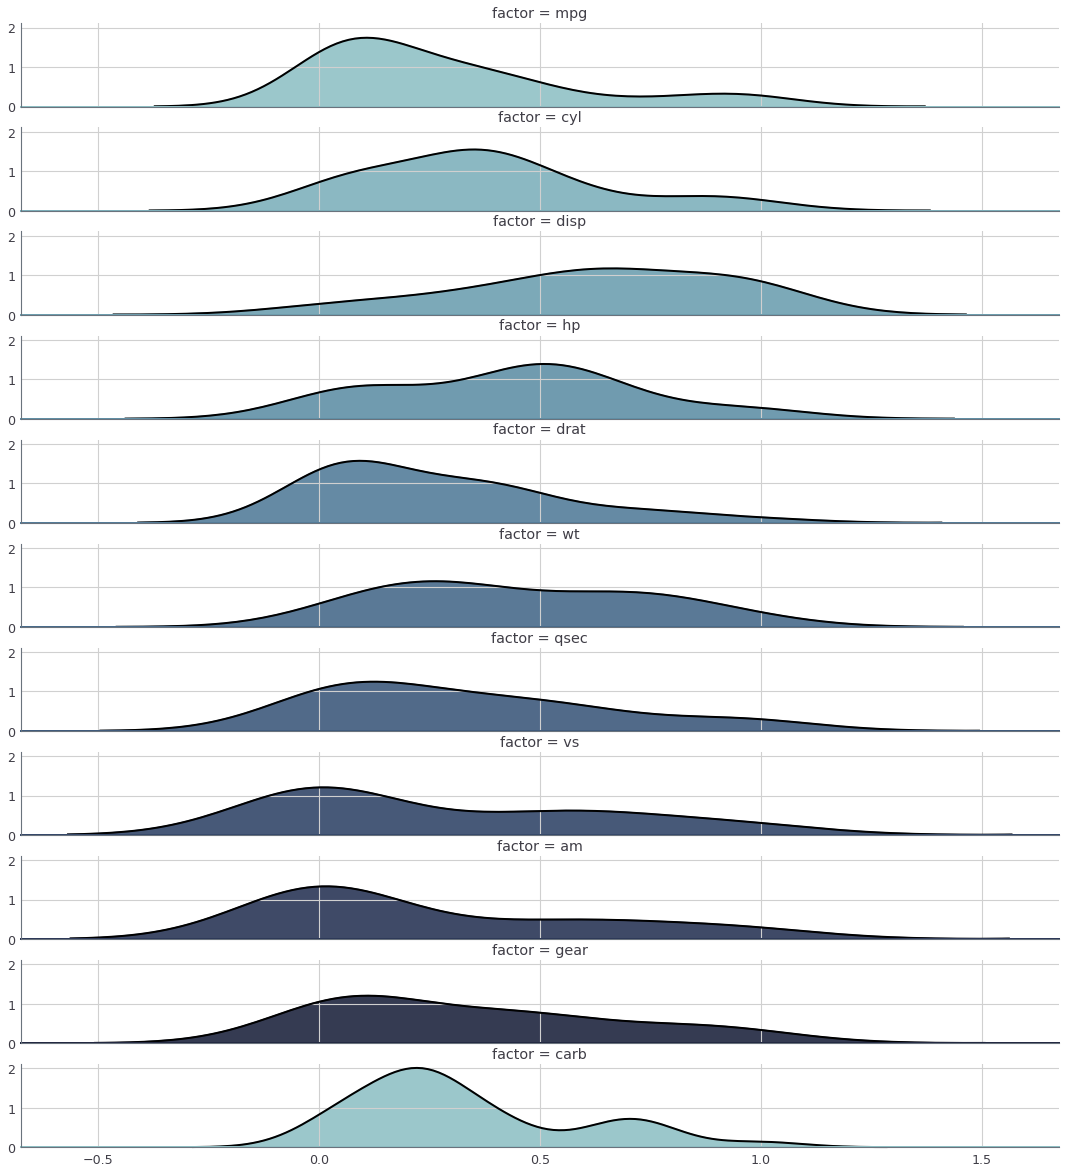

In [177]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(ldata, row="factor", hue="factor", aspect=10, height=1.5, palette=pal)
g.map(sns.kdeplot, "value", clip_on=False, shade=True, alpha=0.9, lw=1.5)
g.map(sns.kdeplot, "value", clip_on=False, color="black", lw=2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

g.fig.subplots_adjust(hspace=.25)

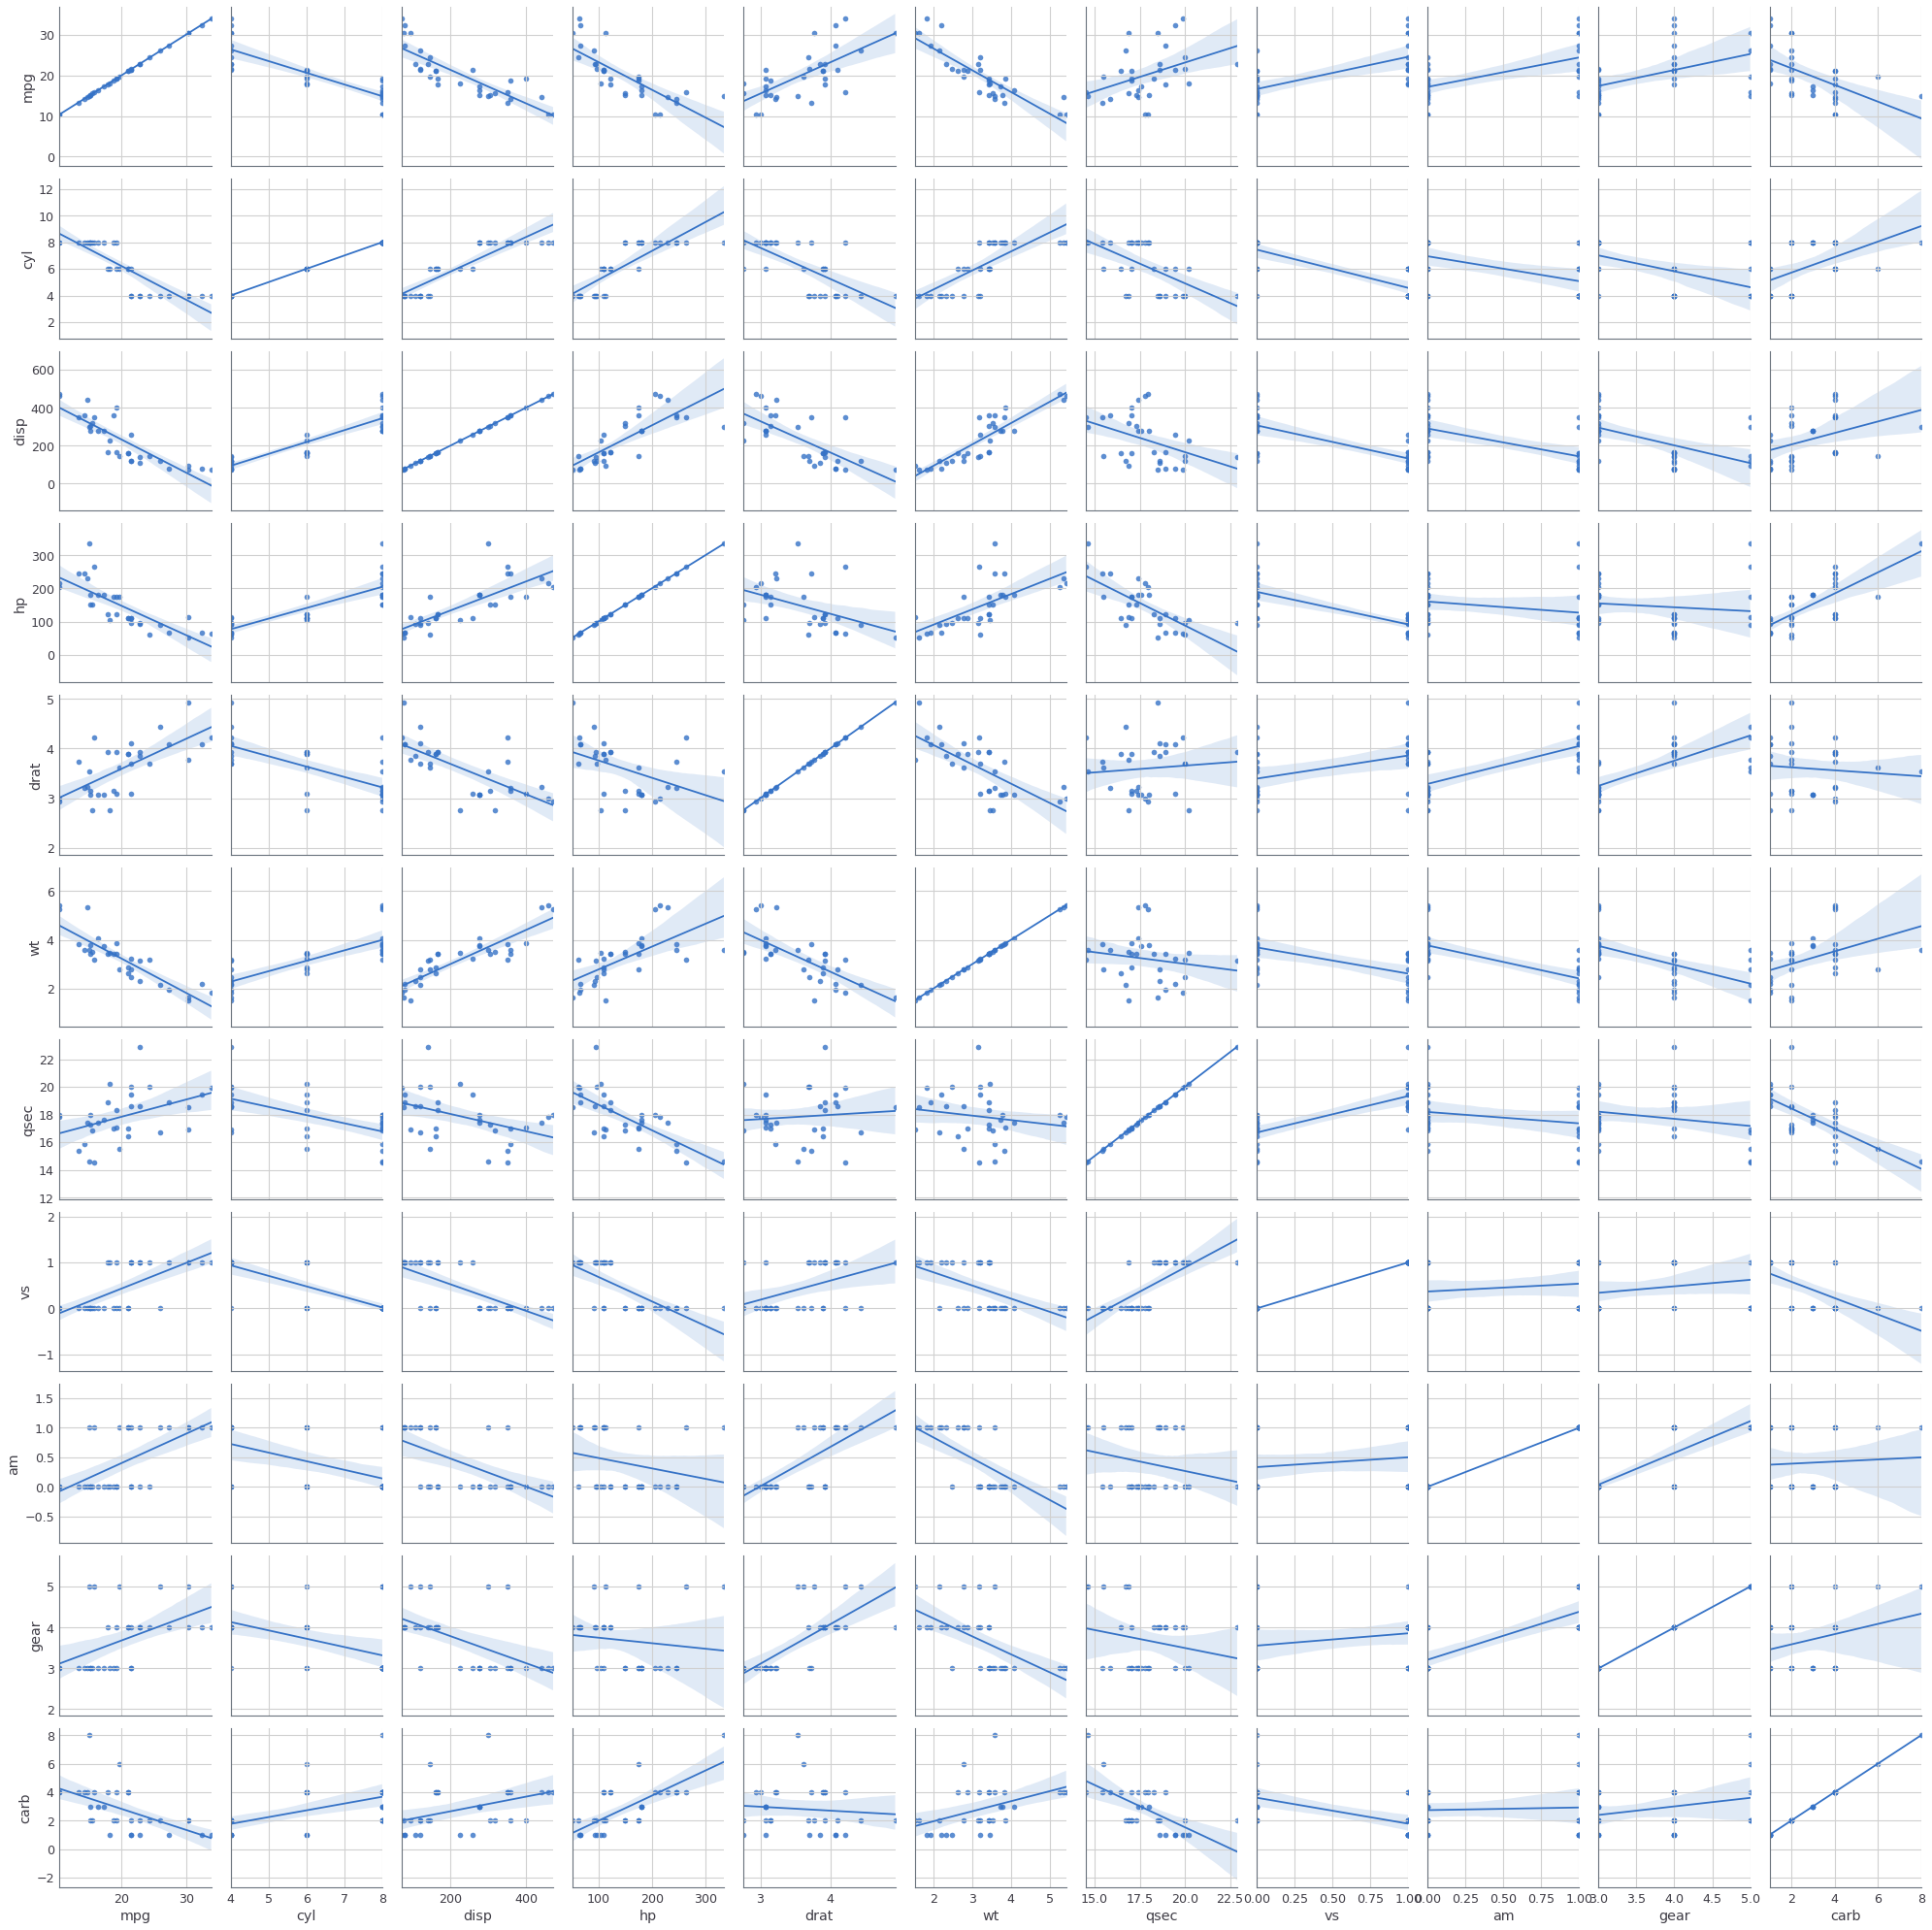

In [12]:
g = sns.PairGrid(data)
g.map(sns.regplot)